# Fail Fast

This notebook will focus on a Fail Fast strategy of the Home Credit Default Risk, a Kaggle competition in which we have to predict whether a client is elegible to be given credit.

In [ ]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/home/hugo/Documents/DataScience/Kaggle/kaggle_credit_risk/notebooks'

# Exploring some of the files given in the competition

First, let's explore the data a little bit. There are a few files which we have to explore in order to understand the data/problem.

In [3]:
DATA_PATH = '/home/hugo/Documents/DataScience/Kaggle/kaggle_credit_risk/data/*'

for filepath in glob.iglob(DATA_PATH):
    print(filepath.split('/')[-1])

bureau.csv
installments_payments.csv
previous_application.csv
POS_CASH_balance.csv
bureau_balance.csv
application_train.csv
sample_submission.csv
credit_card_balance.csv
application_test.csv
HomeCredit_columns_description.csv


Here, we can see that there are 10 datasets, containing informations about payments, applications, balances, and metadatas. We can leverage this to get domain knowledge about the problem and therefore create a good solution.

This notebook will focus on a Fail Fast Strategy, in which I'm going to do a fast treatment of the data, like missing data fillment, and categorical variables treatment.

Let's start importing our first dataset to explore:

## Application_train.csv

In [4]:
application_train = pd.read_csv('../data/application_train.csv')

In [5]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


There are 65 float columns, 41 int columns, and 16 object columns. Depending on the ML algorithm used, we have to transform the object columns into dummies (for linear models), or only get categorical codes for them (for tree based models). 

In [6]:
print('application_train shape: ' + str(application_train.shape))
application_train.head()

application_train shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Here we can see that application_train has 307511 samples and 122 columns. Let's try to analyse it.

Let's figure out how many nulls there is.

In [7]:
list(application_train.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [8]:
application_train.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

### Dropping columns with a lot of missing data
Hum, there are a lot of columns with a large number of missing data. Let's create a function that drops columns with some percentage of missing values.

In [9]:
def drop_missings_columns(df, treshold = 0.9):
    '''
    Function that calculates all columns that have missing data above a certain treshold
    Parameters:
    -----------
    Inputs:
        df(Pandas Dataframe): Dataframe to compute the columns to drop
        thresold(float): limiar to calculate
    Returns:
        drop_columns (list): list with columns to drop
        df_no_missings (pandas dataframe): Dataframe without dropped columns
    '''
    
    total_samples = df.shape[0]
    
    missings_per_column = df.isnull().sum()
    
    percentages_per_column = missings_per_column / total_samples
    drop_columns = list(percentages_per_column[percentages_per_column > treshold].index)
    
    return df.drop(drop_columns, axis=1), drop_columns
    
    

In [10]:
application_train, drop_columns = drop_missings_columns(application_train, treshold = 0.8)

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Right, so now let's treat all the missing data left. Before taking care of them, I'll plot some distributions in order to understand better the data.

I'm going to separate the data by datatypes, leaving numerical data in one dataframe, and categorical columns in other dataframe.

In [11]:
# Separating datatypes

at_object = application_train.select_dtypes(include='object')
at_numerical = application_train.select_dtypes(exclude='object')

print('Object df shape: ' + str(at_object.shape))
print('Numerical df shape: ' + str(at_numerical.shape))

Object df shape: (307511, 16)
Numerical df shape: (307511, 106)


Let's first analyze the numerical dataframe

In [12]:
at_numerical.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


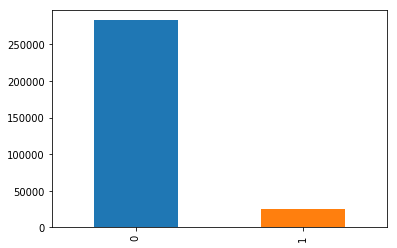

In [13]:
at_numerical.TARGET.value_counts().plot(kind='bar')
plt.show()

We can see that this is an imbalanced learning problem. There are 10 times more 0's than 1's, so I have to adopt some strategy of sampling or something similar.

### FIlling missing data
Let's create a method to fill missing data for numerical features.

In [14]:
def fill_numerical_missings(df1, method='mean'):
    '''
    Function that fills missing data
    Parameters:
    -----------
    Inputs:
        df1 (pandas dataframe): numerical dataframe to fill missings
        method (string): string method
    Returns:
        df (filled pandas dataframe): pandas dataframe with missing treatment
    '''
    
    df = df1.copy()
    
    if method == 'mean':
        for col in df.columns:
            df[col].fillna(value = df[col].mean(), inplace=True)
    elif method == 'median':
        for col in df.columns:
            df[col].fillna(value = df[col].median(), inplace=True)
            
    return df
        
    

In [15]:
at_numerical_clean = fill_numerical_missings(at_numerical, method = 'mean')

For categorical variables, the function is basically the same, but we want to fill with the most frequent label

In [16]:
def fill_categorical_missings(df1, method='mode'):
    '''
    Function that fills missing data
    Parameters:
    -----------
    Inputs:
        df1 (pandas dataframe): numerical dataframe to fill missings
        method (string): string method
    Returns:
        df (filled pandas dataframe): pandas dataframe with missing treatment
    '''
    
    df = df1.copy()
    
    for col in df.columns:
        df[col].fillna(value = df[col].mode().values[0], inplace=True)

    return df
        
    

In [17]:
at_object_clean = fill_categorical_missings(at_object)

Before merging the dataframes, let's create a categorization strategy for our object data. This step is important, since there-s a lot of ML algorithms to use, so I have to be certain that my data is in the right format to it.

If I use dummies, I can apply linear algorithms, such as logistic regression, but if I create a numerical ordinary representation to the data, I can use tree algorithms. In order to reduce cumputational cost amd memory, I'll use the second strategy and I will only work with tree algorithms.

In [18]:
labels, uniques = pd.factorize(at_object_clean['NAME_HOUSING_TYPE'])
at_object_clean['NAME_HOUSING_TYPE'].unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [19]:
def get_catcodes(df):
    '''
    Function that create catcodes to all categorical columns
    Parameters:
    -----------
    Inputs:
        df(pandas dataframe): categorical dataframe to apply the factorize function
    Returns:
        df_dummed(pandas dataframe): datafrmar with categorical variables dummyfied
    '''
    mappers = {}
    for col in df.columns:
        df[col], uniques = pd.factorize(df[col])
        mappers[col] = dict(zip(uniques, df[col].unique()))
        
    return df, mappers

In [20]:
at_object_clean, mappers = get_catcodes(at_object_clean)

Now let's merge the 2 dataframes into one.

In [21]:
at_clean = pd.concat([at_numerical_clean, at_object_clean], axis=1)

In [22]:
at_clean.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,1,1,0,1,1,1,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,1,2,0,0,2,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,2,0,0,0,0,0,0,2,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,1,2,3,0,0,2,0


 Great! Now I have my application_train completelly prepared to serve as input to an ML algorithm.
 
 I'm gonna do the same treatment to the test set, applying the same functions to it

# Aplication_test

In [23]:
application_test = pd.read_csv('../data/application_test.csv')

In [24]:
print('application_test shape: ' + str(application_test.shape))
application_test.head()

application_test shape: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
application_test.isnull().sum()

SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      24
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                 911
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OWN_CAR_AGE                   32312
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE             

In [26]:
application_test.drop(drop_columns, axis=1, inplace=True)

In [27]:
# Separating datatypes

at_object_test = application_test.select_dtypes(include='object')
at_numerical_test = application_test.select_dtypes(exclude='object')

print('Object df shape: ' + str(at_object_test.shape))
print('Numerical df shape: ' + str(at_numerical_test.shape))

Object df shape: (48744, 16)
Numerical df shape: (48744, 105)


In [28]:
at_numerical_test_clean = fill_numerical_missings(at_numerical_test, method = 'mean')
at_object_test_clean = fill_categorical_missings(at_object_test)

In [29]:
for col in at_object_test_clean.columns:
    at_object_test_clean[col] = at_object_test_clean[col].map(mappers[col])

In [30]:
at_clean_test = pd.concat([at_numerical_test_clean, at_object_test_clean], axis=1)

In [31]:
at_clean_test.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,1,1,0,0,6,13,0,0,0,0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0,1,0,13,5,9,0,0,2,0
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,...,1,1,0,4,1,25,0,0,2,0
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,...,0,1,0,5,0,0,0,0,2,0
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,...,0,1,0,0,5,0,0,0,2,0


Awesome! Now both train and test dataframe are ready to some Machine Learning. Let's begin.

# Machine Learning

Since I'm going to use tree models, I'm not gonna to scale my data.

Let's define my X (feature matrix) and y (target array)

In [32]:
y_train = at_clean.TARGET.values
at_clean.drop('SK_ID_CURR', axis=1, inplace=True) # Dropping the ID column
X_train = at_clean.drop('TARGET', axis=1).values

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, RandomTreesEmbedding, VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

Now I'm going to create several classifiers in order to test them all. I'm not going to select hyperparameters for now, just test them as is.

In [34]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
#rte = RandomTreesEmbedding
#vc = VotingClassifier

classifiers = {
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging Classifier': bc,
    'Extra Tree Classifier': etc,
    'Gradient Boosting': gbc
}


As a validation method, since the data is imbalanced, I'll use Stratified Shuffle Split

In [35]:
sss = StratifiedShuffleSplit(n_splits = 5)

In [36]:
for model, clf in classifiers.items():
    
    roc_aucs = []
    
    for train_index, val_index in sss.split(X_train, y_train):
        X_train_, y_train_ = X_train[train_index, :], y_train[train_index]
        X_val_, y_val_ = X_train[val_index, :], y_train[val_index]
        
        clf.fit(X_train_, y_train_)
        roc_aucs.append(roc_auc_score(y_val_, clf.predict_proba(X_val_)[:,1]))
    
    print('Classifier: ' + model)
    print('-------------------')
    print(roc_aucs)
    print('AUC: {} +/- {}'.format(np.array(roc_aucs).mean(), np.array(roc_aucs).std()))
    print('='*20)
    


Classifier: Random Forest
-------------------
[0.6389419612315245, 0.6328603287953614, 0.640061733880023, 0.6321547277082163, 0.6272230067141482]
AUC: 0.6342483516658547 +/- 0.0047220911464822945
Classifier: Decision Tree
-------------------
[0.5519439792556202, 0.541729948516729, 0.5439041515415299, 0.5430279254194005, 0.5383256823822488]
AUC: 0.5437863374231057 +/- 0.004498525936592135
Classifier: Extra Tree Classifier
-------------------
[0.6258729654195133, 0.6311291396801231, 0.6327159817111162, 0.6194417343749516, 0.6373033183716412]
AUC: 0.6292926279114691 +/- 0.006131842845170547
Classifier: Bagging Classifier
-------------------
[0.6399132695131735, 0.641430039383304, 0.6470866799254563, 0.6377553860289376, 0.6351879825154252]
AUC: 0.6402746714732592 +/- 0.004002253096465577
Classifier: Gradient Boosting
-------------------
[0.7546912339363472, 0.7589739059308059, 0.7595101214417436, 0.7492461419388015, 0.7477580007170911]
AUC: 0.7540358807929578 +/- 0.004840129486354018
Class

Cool! There are 2 models that got better results, named Gradient Boosting (best) and AdaBoost. There are both based on a technique called Boosting, where tree are built in order to minimize the error of the predecessor tree. Now, let's create a submission file.

# Creating Submit File

In [41]:
id_col = at_clean_test.SK_ID_CURR.values
X_test = at_clean_test.drop('SK_ID_CURR', axis=1)

pd.DataFrame(
    {
        'SK_ID_CURR': id_col,
        'TARGET': gbc.predict_proba(X_test)[:,1]
    }
).to_csv('../submissions/Submission_fail_fast_gbc.csv', index = None)

This solution got 0.73456 of AUC. It's 7 points below the first place, so now I'll try to improve my solution by doing better dataprep and feature engineering. Later, I'll try to use some techniques on Hyperparameter optimization, such as Bayesian Optimization. Stay tunned!